# Project: Investigating tmdb movies data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### introduction

In this data analysis project, I am Investigating a TMDb movies database file which has collection of important details of more than 10,000 movies including their details such as budget, revenue, etc.

Lets take a look at TMDb movie csv file

## Question to ask :
Question 1 : ( what is the gener that is more preduced all over the years ?)

              -how movies genres have grown over the period of the data (1960-2015)?
              
Question 2 :(are the movies profits have been increasing over the years ?)

             -the average of the earned profits ? 
             
             -the movies that had the maxmum and the minmum profits ?
             
Question 3:(is there a relation between vote average and popularity? )

            -what is the most popular movie in our dataset ?
            
            -which movie got the higher vote average ?

### importing Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style('darkgrid')

In [2]:
#reading csv.. 

df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data wrangling :


In [3]:
#numbers of rows and columns..
df.shape

(10866, 21)

In [4]:
#trying to unrerstand the data more 

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#to know if there missing values and the types of the data in every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#Finding the total of the null value 

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning (handling unused and missing data)
 -imdb_id, homepage, tagline, overview, production_companies, keywords, budget_adj, release_date, revenue_adj, runtime columns that i'm not going to use ,so i droped them 
 
 -drop duplicate data 
 
 -removing 0's from budget and revenue column 
 

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

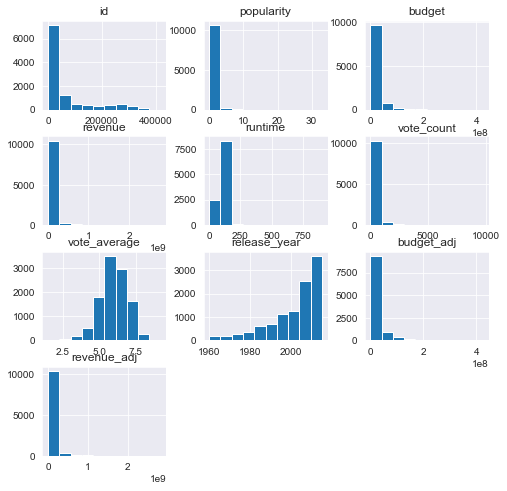

In [7]:
# take an overall look to the data 

df.hist(figsize=(8,8))

In [8]:
#drop the column that i will not use 

df.drop(['imdb_id','homepage','tagline','overview','cast','production_companies','keywords','budget_adj','release_date','revenue_adj','runtime'], axis=1, inplace=True)

In [9]:
#show the duplicate rows
df[df.duplicated(['id'], keep=False)]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010


In [10]:
#drop the duplicates rows 
df.drop_duplicates(inplace=True)

In [11]:
#drop the null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   genres          10731 non-null  object 
 8   vote_count      10731 non-null  int64  
 9   vote_average    10731 non-null  float64
 10  release_year    10731 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1006.0+ KB


In [12]:
#the counts of the 0's in the budget and revenue columns in each year 
df[['budget','revenue','release_year']].groupby('release_year').count()

,budget,revenue
release_year,,
1960,32,32
1961,31,31
1962,32,32
1963,34,34
1964,42,42
1965,35,35
1966,46,46
1967,38,38
1968,38,38


In [13]:
#drop the 0's 
df.drop(df[df['revenue'] == 0].index, inplace=True)

In [14]:
#numbers of rows and columns after droping unused data 
df.shape

(4843, 11)

 ## Question 1 : ( what is the gener that is more preduced all over the years ?)
                        how movies genres have grown over the period of the data (1960-2015)?

In [15]:
#splitting the genres ..

df.genres=df.genres.apply(lambda x:x.split("|"))
df_genres_analysis = df.explode('genres')
df_genres_analysis.head()

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,6185,7.1,2015


In [16]:
generes_per_year = df_genres_analysis.groupby(['release_year','genres'],as_index=False).id.agg('count')

<AxesSubplot:xlabel='release_year', ylabel='id'>

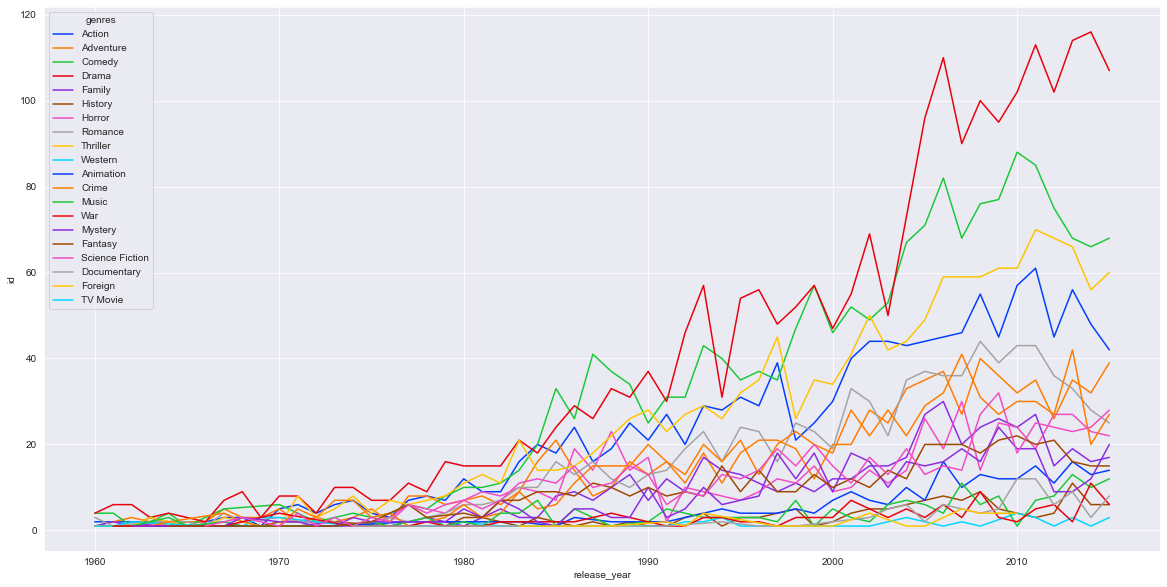

In [17]:
#plot a line for each genre that shows the number of movies (by id) produced in each year
plt.figure(figsize=(20,10))
palette = sns.color_palette("bright", 20)
sns.lineplot(x="release_year", y="id", hue="genres",data =generes_per_year, palette=palette)



This figure shows that drama is the most popular and the most increasing genre in term of number of movies per year It can be obviously seen that Drama has been on the top almost all the period, comedy comes next and then thriller We can have a better look if we zoom on the top 7.

In [18]:
#showing the top 7 genres to be more clear ..
top_7 = list(generes_per_year.groupby('genres').id.sum().sort_values(ascending=False).to_dict().keys())[:7]

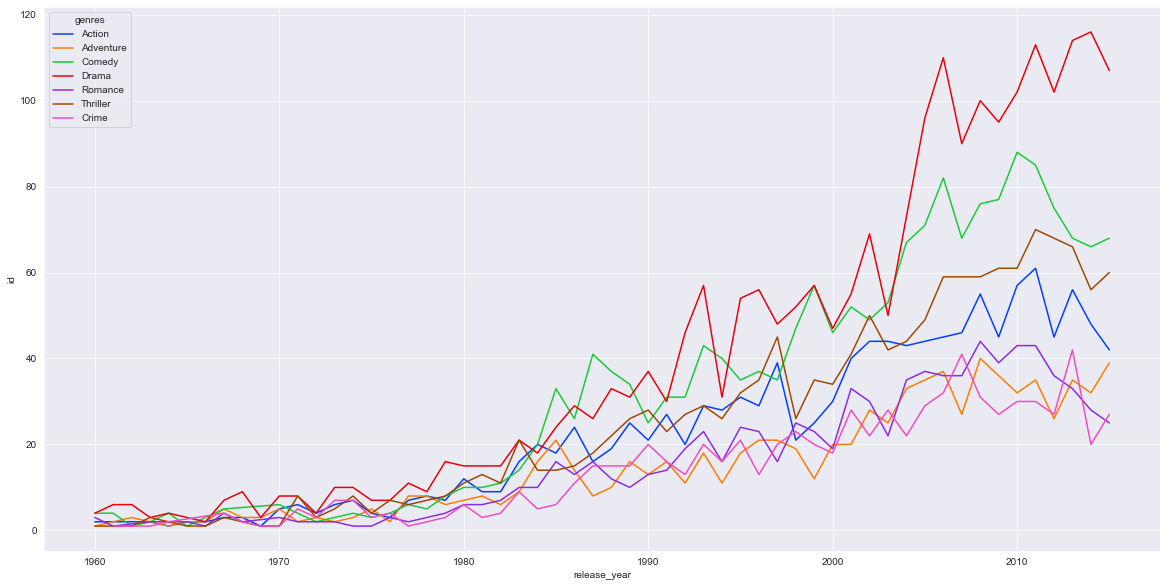

In [48]:
plt.figure(figsize=(20,10))
palette = sns.color_palette("bright", 7)
sns.lineplot(x="release_year", y="id", hue="genres",data =generes_per_year.loc[generes_per_year.genres.isin(top_7)],palette = "bright")
plt.show()

## Question 2 :(are the movies profits have been increasing over the years ?)
                    the average of the earned profits ? 
                    the movies that had the maxmum and the minimum profits ?

In [20]:
#insert a new column which will hold the profit values of each movie
#To calculate the earnd profit of each movie, we need to substract the budget from the revenue of each movie

df[["profit_earned"]] = df['revenue']-df['budget']

In [21]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit_earned
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,"[Action, Adventure, Science Fiction, Thriller]",6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,"[Adventure, Science Fiction, Thriller]",2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,"[Action, Adventure, Science Fiction, Fantasy]",5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,"[Action, Crime, Thriller]",2947,7.3,2015,1316249360


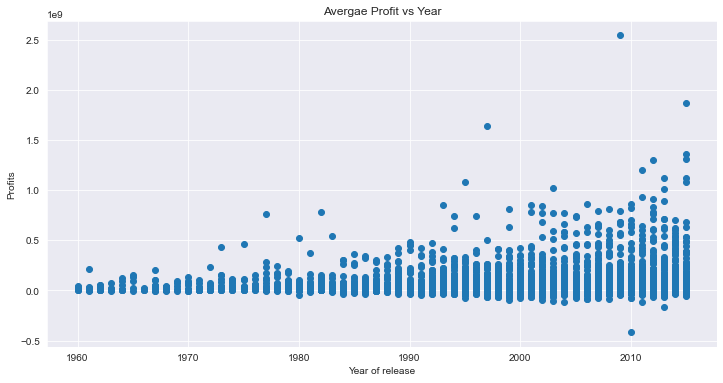

In [22]:
#scatter plot of the profits through the years.
#As we can see from this graph in general movies with years have a tendency to have medium high profits average,
# there are sevral movies had lost 
plt.figure(figsize=(12, 6))
plt.scatter( df['release_year'], df['profit_earned'])

# title and labels
plt.title('Avergae Profit vs Year')
plt.xlabel('Year of release')
plt.ylabel('Profits');

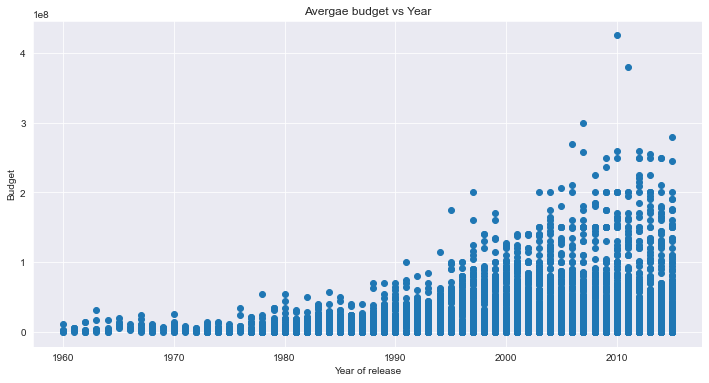

In [23]:
#scatter plot of the budget through the years.
#As we can see from this graph in general movies with years have a tendency to have high budget average.
#also we can see that a lot of movies had 0 for budget.
plt.figure(figsize=(12, 6))
plt.scatter( df['release_year'], df['budget'])

# title and labels
plt.title('Avergae budget vs Year')
plt.xlabel('Year of release')
plt.ylabel('Budget');

as we can see , there is increasing in the profits all over the years  

In [24]:
#show more details about profits
df['profit_earned'].describe()

count    4.843000e+03
mean     5.973608e+07
std      1.366909e+08
min     -4.139124e+08
25%      8.878600e+04
50%      1.510272e+07
75%      6.420268e+07
max      2.544506e+09
Name: profit_earned, dtype: float64

In [25]:
#show the title of the movie that got the most profits 
df[df['profit_earned']==df['profit_earned'].max()]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit_earned
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"[Action, Adventure, Fantasy, Science Fiction]",8458,7.1,2009,2544505847


In [26]:
#show the title of the movie that got the least profits 
df[df['profit_earned']==df['profit_earned'].min()]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit_earned
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,"[Adventure, Fantasy, Action, Western, Thriller]",74,6.4,2010,-413912431


In [49]:
#show more details about budget
df['budget'].describe()

count    4.843000e+03
mean     2.960373e+07
std      4.053107e+07
min      0.000000e+00
25%      1.700000e+06
50%      1.500000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [50]:
#show the title of the movie that got the most profits 
df[df['budget']==df['budget'].max()]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit_earned
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,"[Adventure, Fantasy, Action, Western, Thriller]",74,6.4,2010,-413912431


## Question 3:(is there a relation between vote average and popularity? )
                    what is the most popular movie in our dataset ?
                    which movie got the higher vote average ?

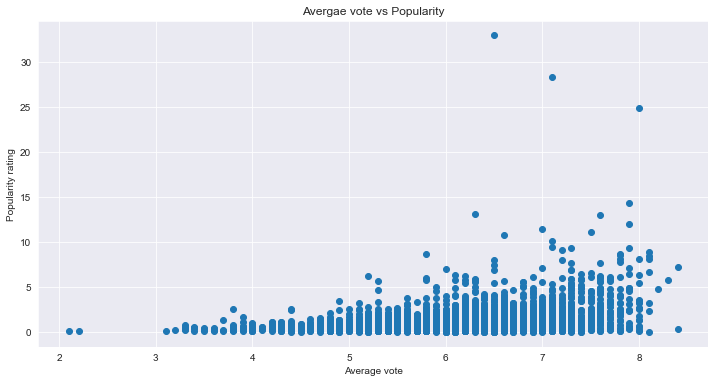

In [27]:
# scatter plot shows the relations between the vote average and popularity 
# it shows that there is relation , as the years in increasment 
plt.figure(figsize=(12, 6))
plt.scatter( df['vote_average'], df['popularity'])

# title and labels
plt.title('Avergae vote vs Popularity')
plt.xlabel('Average vote')
plt.ylabel('Popularity rating');

In [28]:
df['vote_average'].describe()

count    4843.000000
mean        6.149060
std         0.798274
min         2.100000
25%         5.600000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [29]:
df[df['vote_average']==df['vote_average'].max()]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit_earned
4178,278,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,"[Drama, Crime]",5754,8.4,1994,3341469
7948,24128,0.283191,1200000,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,"[Documentary, Music]",23,8.4,1984,3778922


In [30]:
df[df['popularity']==df['popularity'].max()]

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit_earned
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,"[Action, Adventure, Science Fiction, Thriller]",5562,6.5,2015,1363528810


## Question 4 :(Who are the most successful directors in terms of profits and users ratings?)


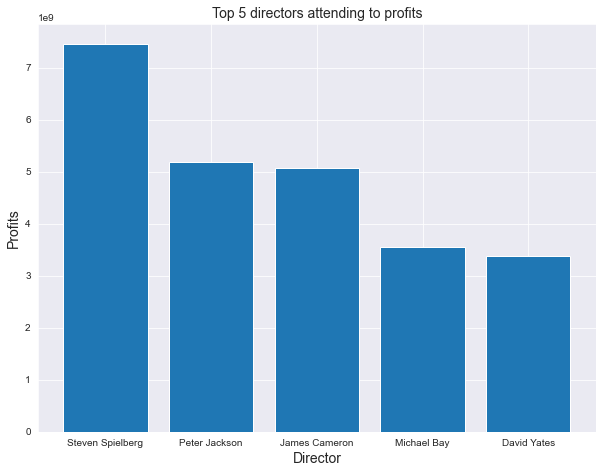

In [47]:
#creating bar chart to see who's the directors of the highest profits 
director=df.groupby('director')['profit_earned'].sum()
top5=director.sort_values(ascending=False).head()
#size of the graph
plt.subplots(figsize=(10,7.5))
plt.bar(top5.index,top5,);
#labels
plt.title('Top 5 directors with highest profits',fontsize=14)
plt.xlabel('Director',fontsize=14)
plt.ylabel('Profits',fontsize=14);

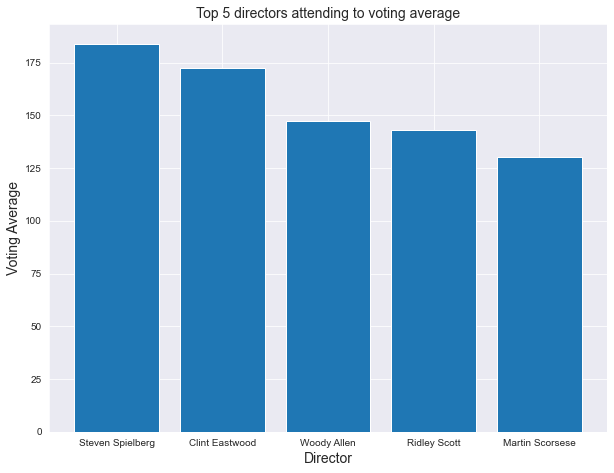

In [46]:
#creating bar chart to see the directors that have the highest vote average 
director=df.groupby('director')['vote_average'].sum()
top5=director.sort_values(ascending=False).head()
plt.subplots(figsize=(10,7.5))
plt.bar(top5.index,top5);
plt.title('Top 5 directors with highest voting average',fontsize=14)
plt.xlabel('Director',fontsize=14)
plt.ylabel('Voting Average',fontsize=14);

## Conclusions

in the first question, the graphs has shown a significant increase in the number of movies created in general over the inspected period, although that doesn't apply for some movie genres such as westeren and tv movies, other movie genres production thrived significantly such as drama, comedy and thriller

in the second question,the graph shown an increasment in profit with the years . we also find that the movie which gain the  higher profits as (Avatar ), while the movie that lose the most is (The Warrior's Way)

interesting fact : the movie which have the highest budget is the same movie that lost the most (The Warrior's Way)

in the third question , I was trying to find a pattren between the popularity and vote average , it almost save to say that in alot of time when the movie is popular it have a higher voting average ,but not always true . there are movies have a low popularity in the same time have high vote average. we found that the movie having the higher vot average is( The Story of Film: An Odyssey) which have very few popularity , and the most popular movie is (Jurassic World)

in the last question, I made a bar graph to see the director with the highest profits (Steven Spielberg) and he also the director with the highest voting average .. he is the most successful director in our data set 

## Limitation

 Although we successfully predited the above properties on TMDb movie dataset, there are many infomation removed such as revenue contained 0 values and null values. The dataset was cut by few thousand rows of movies, which would definitly affect the result.
 
 - I found that budget, revenue and runtime features have a minimum of zero which doesn't make sense especially for budget (after cleaning ther still about 900 movies have 0's budget)
 
 -revenue and budget have no currency unit and this is a problem as these movies have different production companies and being produced in different countries. Also, we don't know how the popularity of these movies is calculated and from what sources votes are collected to take their average
 
 -This study shows definitive results for movies released per year, popularity and voting average, but it doesn't guarantee a recipe for success,It just points out what things are common across successful movies. While these things are common, they might not be the reason for the success of movie.
 